In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
mean1 = [680, 700]
cov1 = [[149, -47], [-47, 209]]

mean2 = [10, 550]
cov2 = [[200, 15], [15, 250]]

In [125]:

data1 = np.random.multivariate_normal(mean1, cov1, 300).T

data2 = np.random.multivariate_normal(mean2, cov2, 300).T


In [155]:
df = pd.DataFrame(data= data1) 
df = df.transpose()
df.columns = ['x1','x2']
df['Y'] = "red" 
df.head()

df2 = pd.DataFrame(data= data2) 
df2 = df2.transpose()
df2.columns = ['x1','x2']
df2['Y'] = "blue" 
df2.head()

train = df.append(df2, ignore_index=True)

train.head()
# train.tail()

,x1,x2,Y
0,675.911762,716.671239,red
1,680.632101,715.043878,red
2,675.963387,695.797099,red
3,669.086648,681.696183,red
4,687.475259,697.229424,red


In [156]:
data3 = np.random.multivariate_normal(mean1, cov1, 200).T

data4 = np.random.multivariate_normal(mean2, cov2, 200).T


df3 = pd.DataFrame(data= data3) 
df3 = df3.transpose()
df3.columns = ['x1','x2']
df3['Y'] = "red" 
df3.head()

df4 = pd.DataFrame(data= data4) 
df4 = df4.transpose()
df4.columns = ['x1','x2']
df4['Y'] = "blue" 
df4.head()

test = df3.append(df4, ignore_index=True)

test.head()



,x1,x2,Y
0,698.040241,702.728038,red
1,681.231427,720.996060,red
2,683.615022,700.498031,red
3,687.959768,676.213679,red
4,671.866934,684.081984,red


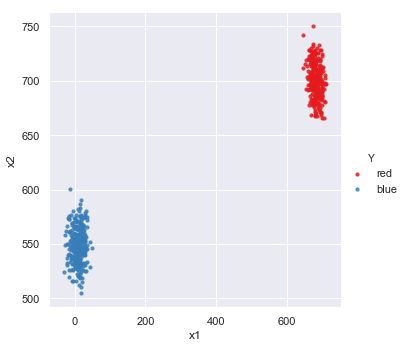

In [157]:
import seaborn as sns
sns.set(color_codes=True)
p = sns.lmplot('x1', 'x2', data= train, hue ='Y', palette="Set1", fit_reg = False, scatter_kws = {"s": 10})


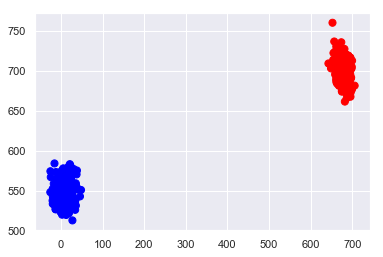

In [158]:
plt.scatter(test["x1"], test["x2"], c=test["Y"],s=50, cmap='RdBu')
lim = plt.axis()

In [159]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_pred=le.fit_transform(train["Y"])

test_pred=le.fit_transform(test["Y"])


In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


gnb = GaussianNB()
gnb.fit(train.loc[:, train.columns != 'Y'], train_pred)


y_pred = gnb.predict(test.loc[:, test.columns != 'Y'])



# Model Accuracy, how often is the classifier correct?


print("Accuracy:",metrics.accuracy_score(test_pred, y_pred))


Accuracy: 1.0


In [175]:
predict =  test[['x1', 'x2']].copy()
predict['Y'] = y_pred

predict.head()

convert = lambda x: "red" if x==1 else("blue")
predict['Y'] = predict['Y'].map(convert)

predict.head()

,x1,x2,Y
0,698.040241,702.728038,red
1,681.231427,720.996060,red
2,683.615022,700.498031,red
3,687.959768,676.213679,red
4,671.866934,684.081984,red


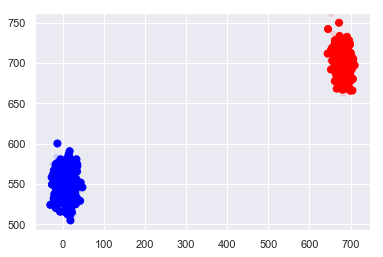

In [177]:
plt.scatter(train["x1"], train["x2"], c=train["Y"],s=50, cmap='RdBu')
lim = plt.axis()


plt.scatter(predict["x1"], predict["x2"], c=predict["Y"], s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# predict =  test[['x1', 'x2']].copy()
# sns.set(color_codes=True)
# p = sns.lmplot('x1', 'x2', data= test, hue ='Y', palette="Set1", fit_reg = False, scatter_kws = {"s": 10})


In [182]:
confusion = metrics.confusion_matrix(predict["Y"], test["Y"])

print(metrics.confusion_matrix(predict["Y"], test["Y"]))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[200   0]
 [  0 200]]


In [187]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(test["Y"], predict["Y"]) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(test["Y"], predict["Y"]) )
print ('Report : ')
print (classification_report(test["Y"], predict["Y"]))

Confusion Matrix :
[[200   0]
 [  0 200]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       200
         red       1.00      1.00      1.00       200

   micro avg       1.00      1.00      1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [196]:
from sklearn.neighbors import KNeighborsClassifier



kList=[]
minusList=[]
plusList=[]
totalList=[]
lowKey=1
highKey=501
Step=5 #Number of different k's to test
n=20 #Number of times for each k to generate train/test sets
p=0.2 #fraction of data set aside for test set

for k in range(lowKey, highKey,Step):
    kList.append(k)
    knnMinusErrorRate=0
    knnPlusErrorRate=0
    knnErrorRate=0
    for i in range(1,n):
        classifier = KNeighborsClassifier(n_neighbors=k)
        X=train.iloc[:,[0,1]]
        classifier.fit(X, train["Y"])
        yPred=classifier.predict(test[['x1','x2']])
        yPredP=classifier.predict_proba(test[['x1','x2']])
        C=confusion_matrix(test["Y"], yPred)
        knnMinusErrorRate+=C[0,1]/(C[0,0]+C[0,1])
        knnPlusErrorRate+=C[1,0]/(C[1,0]+C[1,1])
        knnErrorRate+=(C[1,0]+C[0,1])/sum(sum(C))
    #end inner for
    knnMinusErrorRate/=n #find the avg error over n tests
    knnPlusErrorRate/=n
    knnErrorRate/=n
    minusList.append(knnMinusErrorRate) #store for graphing
    plusList.append(knnPlusErrorRate)
    totalList.append(knnErrorRate)
#end for


Best K value ::  1
Error rate for k=1 is 0.000
confusion matrix:
[[200   0]
 [  0 200]]


In [197]:

bestErrRate=min(totalList)
bestK=kList[np.argmin(totalList)]

print("Best K value :: ",bestK)
classifier=KNeighborsClassifier(n_neighbors=bestK)
X=train.iloc[:,[0,1]]
classifier.fit(X, train["Y"])

yTestPred=classifier.predict(test.iloc[:,[0,1]])
yTestPredP=classifier.predict_proba(test.iloc[:,[0,1]])
C=confusion_matrix(test["Y"],yTestPred)

   
s='Error rate for k={0:d} is {1:.3f}'
print(s.format(bestK, bestErrRate))
print('confusion matrix:')
print(C)

Best K value ::  1
Error rate for k=1 is 0.000
confusion matrix:
[[200   0]
 [  0 200]]
